In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv',
               names=['Id number','RI: refractive index','Na: Sodium','Mg: Magnesium','Al: Aluminum','Si: Silicon','K: Potassium','Ca: Calcium','Ba: Barium','Fe: Iron','Type of glass'])


In [3]:
df.head()

,Id number,RI: refractive index,Na: Sodium,Mg: Magnesium,Al: Aluminum,Si: Silicon,K: Potassium,Ca: Calcium,Ba: Barium,Fe: Iron,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
df.shape

(214, 11)

This dataset contains 214 rows and 11 columns

Let's check for nulls in the dataset

In [5]:
df.isnull().sum()

Id number               0
RI: refractive index    0
Na: Sodium              0
Mg: Magnesium           0
Al: Aluminum            0
Si: Silicon             0
K: Potassium            0
Ca: Calcium             0
Ba: Barium              0
Fe: Iron                0
Type of glass           0
dtype: int64

From, the above we can confirm there are no nulls in the dataset

Let's check for duplicates in the dataset

In [6]:
df.duplicated().sum()

0

This dataset doesn't contain duplicate records

Let's check for statistical information of the dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id number             214 non-null    int64  
 1   RI: refractive index  214 non-null    float64
 2   Na: Sodium            214 non-null    float64
 3   Mg: Magnesium         214 non-null    float64
 4   Al: Aluminum          214 non-null    float64
 5   Si: Silicon           214 non-null    float64
 6   K: Potassium          214 non-null    float64
 7   Ca: Calcium           214 non-null    float64
 8   Ba: Barium            214 non-null    float64
 9   Fe: Iron              214 non-null    float64
 10  Type of glass         214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


Let's check the statistical information of the data.

In [8]:
df.describe()

,Id number,RI: refractive index,Na: Sodium,Mg: Magnesium,Al: Aluminum,Si: Silicon,K: Potassium,Ca: Calcium,Ba: Barium,Fe: Iron,Type of glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


As, per my observation there may not be skeweness present in the dataset. Outliers are present in the dataset.

Let's categorize feature Type of Glass by assigning Window glass for class between 1 to 4 and Non-window glass for 5 to 7

In [9]:
df['Type of glass'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type of glass, dtype: int64

In [10]:
df.head()

,Id number,RI: refractive index,Na: Sodium,Mg: Magnesium,Al: Aluminum,Si: Silicon,K: Potassium,Ca: Calcium,Ba: Barium,Fe: Iron,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [11]:
n=0
for value in df['Type of glass']:
    if value in range(1,5):
        df['Type of glass'].iloc[n]='Window glass'
        n+=1
        continue
    if value in range(5,8) : 
        df['Type of glass'].iloc[n]='Non Window glass'
        n+=1
        continue

In [12]:
df['Type of glass'].value_counts()

Window glass        163
Non Window glass     51
Name: Type of glass, dtype: int64

Let's understand the data with the help of plotting techniques

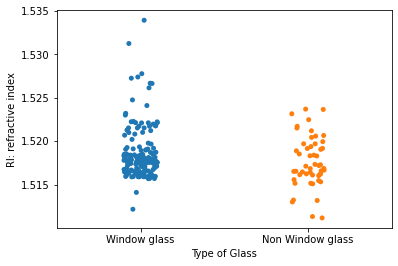

In [13]:
sns.stripplot(x='Type of glass',y='RI: refractive index',data=df)
plt.ylabel('RI: refractive index')
plt.xlabel('Type of Glass')
plt.show()

From the above we can observe Refractive index is high for Window glass and low for Non window glass

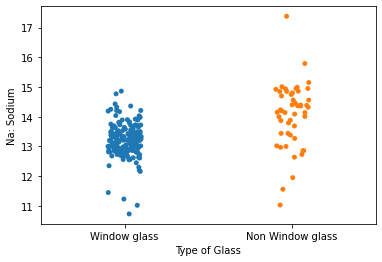

In [14]:
sns.stripplot(x='Type of glass',y='Na: Sodium',data=df)
plt.ylabel('Na: Sodium')
plt.xlabel('Type of Glass')
plt.show()

From the above we can observe Sodium is low for Window glass and high for Non window glass

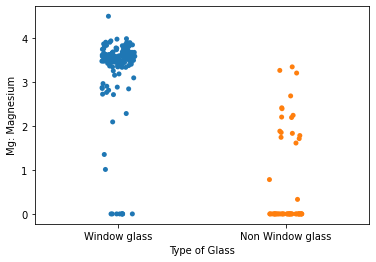

In [15]:
sns.stripplot(x='Type of glass',y='Mg: Magnesium',data=df)
plt.ylabel('Mg: Magnesium')
plt.xlabel('Type of Glass')
plt.show()

From the above we can observe Mg: Magnesium is high for Window glass and low for Non window glass and there are records with 0 Magnesium for both Window glass and Non Window glass.

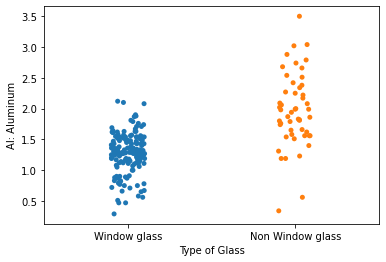

In [16]:
sns.stripplot(x='Type of glass',y='Al: Aluminum',data=df)
plt.ylabel('Al: Aluminum')
plt.xlabel('Type of Glass')
plt.show()

Aluminium is low for Window glass and high for Non window glass

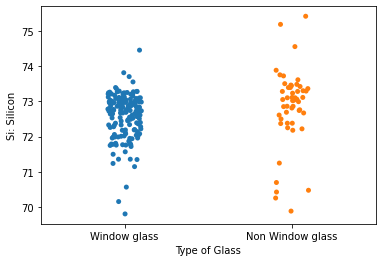

In [17]:
sns.stripplot(x='Type of glass',y='Si: Silicon',data=df)
plt.ylabel('Si: Silicon')
plt.xlabel('Type of Glass')
plt.show()

Silicon is low for Window glass and high for Non window glass

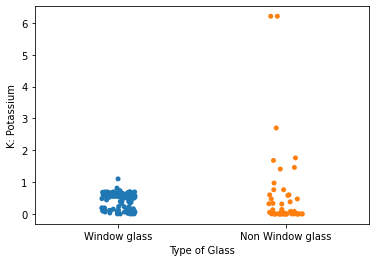

In [18]:
sns.stripplot(x='Type of glass',y='K: Potassium',data=df)
plt.ylabel('K: Potassium')
plt.xlabel('Type of Glass')
plt.show()

Potassium levels are low for for Window glass and Non window glass

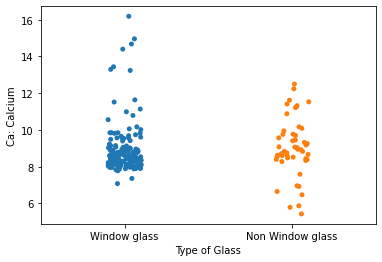

In [19]:
sns.stripplot(x='Type of glass',y='Ca: Calcium',data=df)
plt.ylabel('Ca: Calcium')
plt.xlabel('Type of Glass')
plt.show()

From the above we can observe, for Window glass, calcium is in the range of 8 to 16 and for Non window glass Calcium is the range of 5 to 13

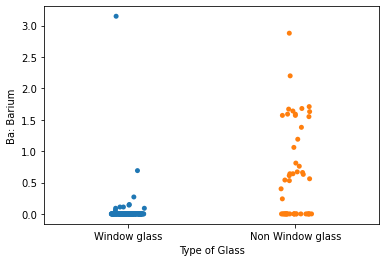

In [20]:
sns.stripplot(x='Type of glass',y='Ba: Barium',data=df)
plt.ylabel('Ba: Barium')
plt.xlabel('Type of Glass')
plt.show()

From the above we an observe, Barium is in the range of 0 to 1 and for Non window glass, Barium is in the range of 0 to 3

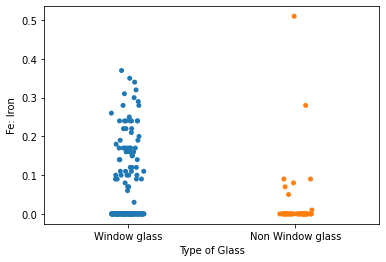

In [21]:
sns.stripplot(x='Type of glass',y='Fe: Iron',data=df)
plt.ylabel('Fe: Iron')
plt.xlabel('Type of Glass')
plt.show()

From the above we can observe, Iron levels are in the range of 0 to 4 for Window glass and for Non Window glass there are more number of records in between 0 to 1.

Let's check how the data is distributed with the help of dist plot

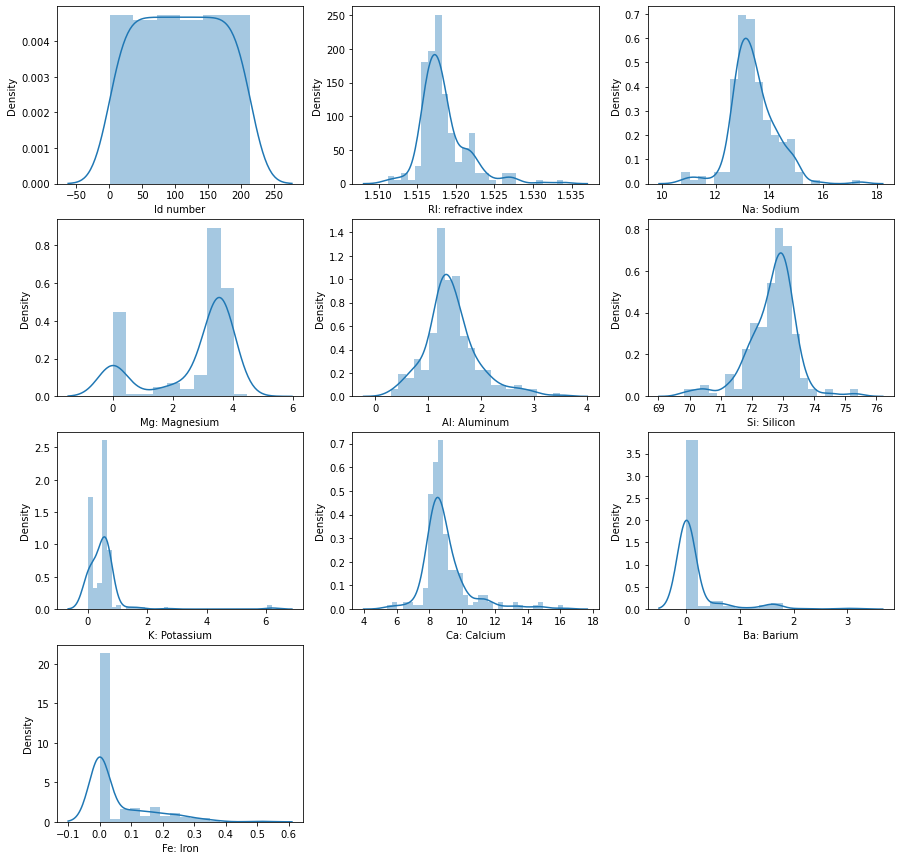

In [22]:
n=1
plt.figure(figsize=(15,15))
for i in df.columns[0:10]:
    ax=plt.subplot(4,3,n)
    sns.distplot(x=df[i])
    plt.xlabel(i)
    n+=1
    
plt.show()    

From the above graph we can observe skeweness in features Potassium,Barium,Iron. Let's remove the skeweness with the help of power transformation techniques.

In [23]:
df['K: Potassium']=np.cbrt(df['K: Potassium'])
df['Ba: Barium']=np.cbrt(df['Ba: Barium'])
df['Fe: Iron']=np.cbrt(df['Fe: Iron'])
df['RI: refractive index']=np.cbrt(df['RI: refractive index'])
df['Mg: Magnesium']=np.cbrt(df['Mg: Magnesium'])
df['Al: Aluminum']=np.cbrt(df['Al: Aluminum'])
df['Si: Silicon']=np.cbrt(df['Si: Silicon'])


In [24]:
df.skew()

Id number               0.000000
RI: refractive index    1.617049
Na: Sodium              0.454181
Mg: Magnesium          -1.440196
Al: Aluminum           -0.204132
Si: Silicon            -0.776908
K: Potassium           -0.591896
Ca: Calcium             2.047054
Ba: Barium              2.073007
Fe: Iron                0.894683
dtype: float64

Since, skeweness values are high let's again perform power transformation techniques and try to reduce the value.

In [25]:
from scipy.stats import boxcox
df['Mg: Magnesium']=np.cbrt(df['Mg: Magnesium'])
df['RI: refractive index']=np.cbrt(df['RI: refractive index'])
df['Si: Silicon']=boxcox(df['Si: Silicon'])[0]
df['Ca: Calcium']=np.cbrt(df['Ca: Calcium'])
df['Ba: Barium']=np.cbrt(df['Ba: Barium'])
df['Fe: Iron']=np.cbrt(df['Fe: Iron'])
df.skew()

Id number               0.000000
RI: refractive index    1.614260
Na: Sodium              0.454181
Mg: Magnesium          -1.523837
Al: Aluminum           -0.204132
Si: Silicon             0.130526
K: Potassium           -0.591896
Ca: Calcium             1.407358
Ba: Barium              1.756306
Fe: Iron                0.762576
dtype: float64

Even after applying powertransformation techniques, skeweness value for few features are not changed. Let's continue further

Now, the skeweness is removed and the data is almost normally distributed.

Let's check for outliers present in the dataset

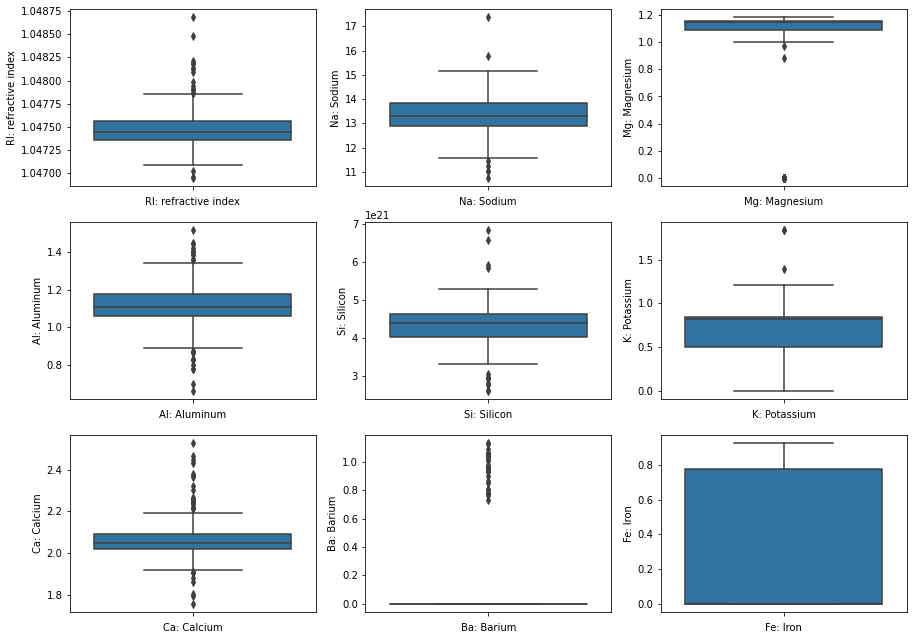

In [26]:
n=1
plt.figure(figsize=(15,15))
for i in df.columns[1:10]:
    ax=plt.subplot(4,3,n)
    sns.boxplot(y=df[i])
    plt.xlabel(i)
    n+=1
    
plt.show()    

Ouliers are present in Refractive Index, Sodium, Magnesium,Aluminium,Silicon,potassium,calcium,Barium features. Let's remove outliers.

In [27]:
df.columns

Index(['Id number', 'RI: refractive index', 'Na: Sodium', 'Mg: Magnesium',
       'Al: Aluminum', 'Si: Silicon', 'K: Potassium', 'Ca: Calcium',
       'Ba: Barium', 'Fe: Iron', 'Type of glass'],
      dtype='object')

In [28]:
from scipy.stats import zscore
value=zscore(df[['RI: refractive index','Na: Sodium','Mg: Magnesium','Al: Aluminum', 'Si: Silicon', 'K: Potassium', 'Ca: Calcium',
       'Ba: Barium']])
zvalue=np.abs(value)

In [29]:
np.where(zvalue>3)

(array([ 21, 106, 106, 106, 107, 107, 110, 111, 112, 112, 163, 163, 171,
        172, 184, 184, 184, 185, 201], dtype=int64),
 array([3, 0, 1, 4, 0, 6, 6, 6, 0, 6, 3, 4, 5, 5, 1, 3, 4, 6, 4],
       dtype=int64))

In [30]:
df1=df[(zvalue<3).all(axis=1)]

In [31]:
df1.shape

(202, 11)

Let's encode the Type of Glass feature

In [32]:
df1['Type of glass'].value_counts()

Window glass        157
Non Window glass     45
Name: Type of glass, dtype: int64

In [33]:
df1['Type of glass']=df1['Type of glass'].replace('Window glass',0)

In [34]:
df1['Type of glass']=df1['Type of glass'].replace('Non Window glass',1)

In [35]:
df1['Type of glass'].value_counts()

0    157
1     45
Name: Type of glass, dtype: int64

As, per my observation Id number filed does not contribute in predicting target variable. Let's drop this feature

In [36]:
df1.drop('Id number',axis=1,inplace=True)

Let's check the correlation between the features and with target variable

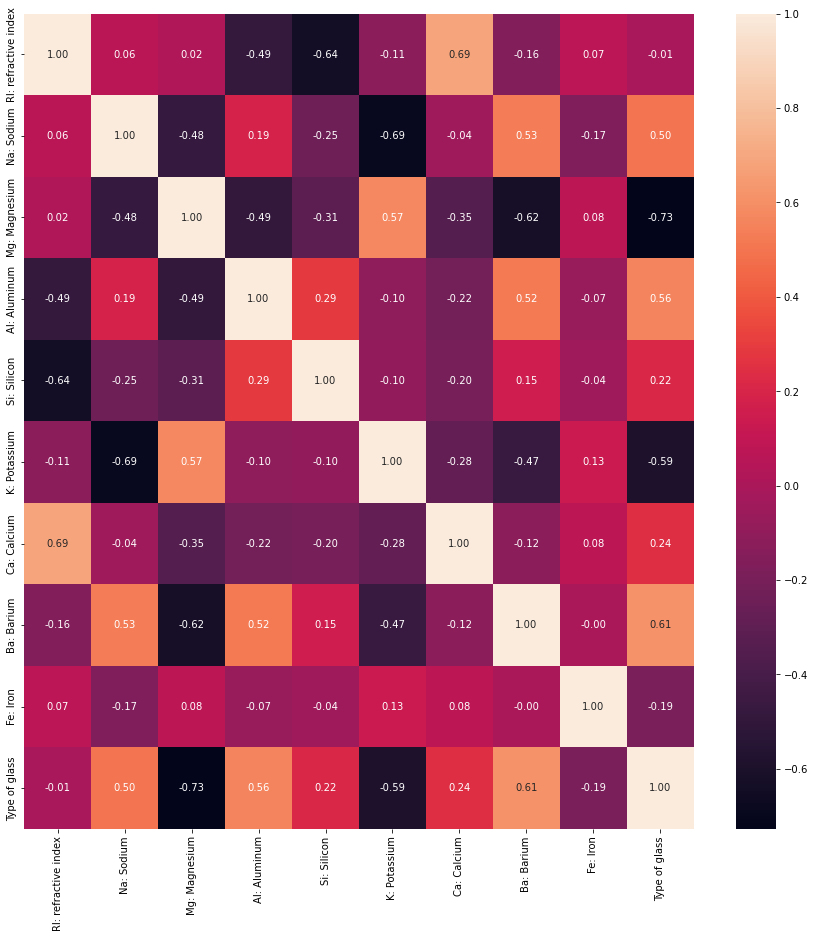

In [37]:
plt.figure(figsize=(15,15))
sns.heatmap(df1.corr(),annot=True,fmt='.2f')
plt.show()

All the features are positively and negatively correlated with target variable

Let's check if there is multi collinearity problem exists.

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [39]:
x=df1.drop('Type of glass',axis=1)
y=df1['Type of glass']

In [40]:
Vif=pd.DataFrame()
Vif['Features']=x.columns
Vif['vif value']=[variance_inflation_factor(x,i) for i in range(x.shape[1])]
Vif

,Features,vif value
0,RI: refractive index,0.000003
1,Na: Sodium,0.169261
2,Mg: Magnesium,0.832292
3,Al: Aluminum,0.691583
4,Si: Silicon,269.113214
5,K: Potassium,0.910123
6,Ca: Calcium,0.102309
7,Ba: Barium,1.012672
8,Fe: Iron,0.988630


Variance Inflation Factor value for Silicon is very high.

As per my observation, if Silicon feature is dropped Vif values for other features are highly increasing. Let's continue further without dropping.

In [41]:
df1['Type of glass'].value_counts()

0    157
1     45
Name: Type of glass, dtype: int64

From the above we can observe there is class imbalance problem.

In [42]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x,y=SM.fit_resample(x,y)
y.value_counts()

0    157
1    157
Name: Type of glass, dtype: int64

Let's findout best Random state and train the model with the dataset.

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [44]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [45]:
max_acc=0
max_rand_state=0
for i in range(1,300):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=i)
    RFC=RandomForestClassifier()
    RFC.fit(x_train,y_train)
    y_predict=RFC.predict(x_test)
    acc_score=accuracy_score(y_test,y_predict)
    if(acc_score>max_acc):
        max_acc=acc_score
        max_rand_state=i
        
print("Best Random State - ",max_rand_state," Accuracy score - ",max_acc)        

Best Random State -  18  Accuracy score -  1.0


Best random state is 8 and Accuracy score is 100%

In [65]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=18)

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier,RandomForestClassifier,ExtraTreesClassifier

In [66]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
y_predict_LR=LR.predict(x_test)
acc_score_LR=accuracy_score(y_test,y_predict_LR)
print("Accuracy Score ",acc_score_LR)

Accuracy Score  0.9894736842105263


In [67]:
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)
y_predict_DTC=DTC.predict(x_test)
acc_score_DTC=accuracy_score(y_test,y_predict_DTC)
print("Accuracy Score ",acc_score_DTC)

Accuracy Score  0.9789473684210527


In [68]:
Knn=KNeighborsClassifier()
Knn.fit(x_train,y_train)
y_predict_Knn=Knn.predict(x_test)
acc_score_Knn=accuracy_score(y_test,y_predict_Knn)
print("Accuracy Score ",acc_score_Knn)

Accuracy Score  0.9894736842105263


In [69]:
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
y_predict_ABC=ABC.predict(x_test)
acc_score_ABC=accuracy_score(y_test,y_predict_ABC)
print("Accuracy Score ",acc_score_ABC)

Accuracy Score  0.9894736842105263


In [70]:
GDT=GradientBoostingClassifier()
GDT.fit(x_train,y_train)
y_predict_GDT=GDT.predict(x_test)
acc_score_GDT=accuracy_score(y_test,y_predict_GDT)
print("Accuracy Score ",acc_score_GDT)

Accuracy Score  0.9789473684210527


In [71]:
BC=BaggingClassifier()
BC.fit(x_train,y_train)
y_predict_BC=BC.predict(x_test)
acc_score_BC=accuracy_score(y_test,y_predict_BC)
print('Accuracy Score ',acc_score_BC)

Accuracy Score  0.9789473684210527


In [72]:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
y_predict_RFC=RFC.predict(x_test)
acc_score_RFC=accuracy_score(y_test,y_predict_RFC)
print("accuracy score :",acc_score_RFC)

accuracy score : 1.0


In [73]:
ETC=ExtraTreesClassifier()
ETC.fit(x_train,y_train)
y_predict_ETC=ETC.predict(x_test)
acc_score_ETC=accuracy_score(y_test,y_predict_ETC)
print("Accuracy Score ",acc_score_ETC)

Accuracy Score  0.9894736842105263


From the above we can observe RandomForestClassifier provides highest accuracy of 100%.
Let's check accuracy score provided by these models are due to overfitting of the model.


In [56]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,classification_report

In [74]:
score=cross_val_score(RFC,x,y)
mean=score.mean()
print("Difference is ",acc_score_RFC-mean)

Difference is  0.03809523809523796


In [75]:
score=cross_val_score(LR,x,y)
mean=score.mean()
print("Difference is ",acc_score_LR-mean)

Difference is  0.4894736842105263


In [76]:
score=cross_val_score(Knn,x,y)
mean=score.mean()
print("Difference is ",acc_score_Knn-mean)

Difference is  0.2505591936831325


In [77]:
score=cross_val_score(DTC,x,y)
mean=score.mean()
print("Difference is ",acc_score_DTC-mean)

Difference is  0.03301802894332606


In [78]:
score=cross_val_score(ETC,x,y)
mean=score.mean()
print("Difference is ",acc_score_ETC-mean)

Difference is  0.027568922305764243


In [79]:
score=cross_val_score(GDT,x,y)
mean=score.mean()
print("Difference is ",acc_score_GDT-mean)

Difference is  0.029741019214703512


In [80]:
score=cross_val_score(ABC,x,y)
mean=score.mean()
print("Difference is ",acc_score_ABC-mean)

Difference is  0.046616541353383556


In [81]:
score=cross_val_score(BC,x,y)
mean=score.mean()
print("Difference is ",acc_score_BC-mean)

Difference is  0.020217209690894022


By, calculating cross validation we can justify that accuracy score provided by RandomForestClassifier is due to overfitting of the model.
Bagging classiifer is providing least cross validation score when compared with other models.

Let's generate confusion matrix and classification report

In [82]:
print("Confusion Matrix \n",confusion_matrix(y_test,y_predict_BC))

Confusion Matrix 
 [[46  0]
 [ 2 47]]


In [83]:
print("Classification Report \n",classification_report(y_test,y_predict_BC))

Classification Report 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        46
           1       1.00      0.96      0.98        49

    accuracy                           0.98        95
   macro avg       0.98      0.98      0.98        95
weighted avg       0.98      0.98      0.98        95



Let's tune the parameters and try to increase accuracy score of the model

In [84]:
from sklearn.model_selection import GridSearchCV

In [85]:
param={'max_features':[6,7,8],
      'n_estimators':[11,12,13]}

In [86]:
GSV=GridSearchCV(BC,param_grid=param,n_jobs=-1)
GSV.fit(x_train,y_train)

GridSearchCV(estimator=BaggingClassifier(), n_jobs=-1,
             param_grid={'max_features': [6, 7, 8],
                         'n_estimators': [11, 12, 13]})

In [87]:
GSV.best_params_

{'max_features': 7, 'n_estimators': 11}

In [88]:
Best_model=BaggingClassifier(max_features=7,n_estimators=11)
Best_model.fit(x_train,y_train)
y_predict=Best_model.predict(x_test)
print("Accuracy score - ",accuracy_score(y_test,y_predict))

Accuracy score -  0.9894736842105263


After tuning parameters, accuracy score increased to 99%.

In [89]:
print("confusion matrix\n",confusion_matrix(y_test,y_predict))
print("\n Classificatio report\n",classification_report(y_test,y_predict))

confusion matrix
 [[46  0]
 [ 1 48]]

 Classificatio report
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        46
           1       1.00      0.98      0.99        49

    accuracy                           0.99        95
   macro avg       0.99      0.99      0.99        95
weighted avg       0.99      0.99      0.99        95



Let's generate ROC curve

In [90]:
from sklearn.metrics import roc_auc_score,roc_curve

In [91]:
fpr,tpr,treshold=roc_curve(y_test,y_predict)

In [92]:
print('fpr ',fpr)
print('tpr ',tpr)
print('treshold ',treshold)

fpr  [0. 0. 1.]
tpr  [0.         0.97959184 1.        ]
treshold  [2 1 0]


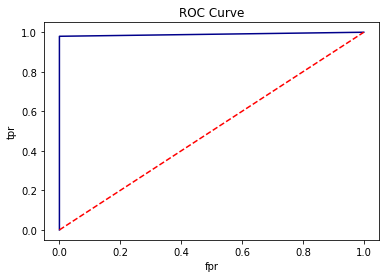

In [93]:
plt.plot(fpr,tpr,color='darkblue')
plt.plot([0,1],[0,1],color='red',linestyle='--')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve')
plt.show()


In [95]:
roc_auc=roc_auc_score(y_test,y_predict)
print('Area under the curve is ',roc_auc)

Area under the curve is  0.9897959183673469
